# Comparison of models' performances

I will load three trained models I made available for each kind, and will inspect their errors statistics produced on the Test set.

In [1]:
import os
import time
import yaml
import numpy as np
import matplotlib.pyplot as plt
import seaborn

# local imports
import tools, holdout

In [2]:
# Load config params
params = yaml.load( open(os.getcwd() + '/config.yaml'), yaml.Loader ) 

# Add this for simplicity
params['size_nan'] = int(params['len_input']*params['total_nan_share']) 

In [3]:
# Once params are loaded, load TensorFlow and set its GPU config
import tensorflow as tf
tools.set_gpu_configurations(params) 

Setting GPU configurations.
1 Physical GPUs, 1 Logical GPUs


In [4]:
# Load models by name
seq2seq_name = 'seq2seq_00'
GAN_name = 'GAN_00'
pGAN_name = 'pGAN_00'

seq2seq = tf.keras.models.load_model(os.getcwd() + '/saved_models/' + seq2seq_name +'.h5') 
GAN = tf.keras.models.load_model(os.getcwd() + '/saved_models/' + GAN_name +'.h5') 
pGAN = tf.keras.models.load_model(os.getcwd() + '/saved_models/' + pGAN_name +'.h5') 

# Run models on Test set

Normally, `holdout.run_test()` returns the following arrays: `X` and `Y` data, predictions, errors, together with a dictionary of error statistics. In this Notebook I will focus only on error arrays `E_` and error `stats_`.


Check model performance on Validation data.
Done in 307.11ss.

	MAE Loss: 0.05882476270198822

Error statistics:
	Mean:            0.05882476
	St dev:          0.02463975 

	Min:             0.0060952753
	25th percentile: 0.04234670661389828
	Median:          0.055126525
	75th percentile: 0.07095329836010933
	Max:             0.38657707


Check model performance on Test data.
Done in 299.02ss.

	MAE Loss: 0.05898692086338997

Error statistics:
	Mean:            0.058986932
	St dev:          0.0248263 

	Min:             0.0029453349
	25th percentile: 0.04276513680815697
	Median:          0.05495383
	75th percentile: 0.07066602632403374
	Max:             0.43441105


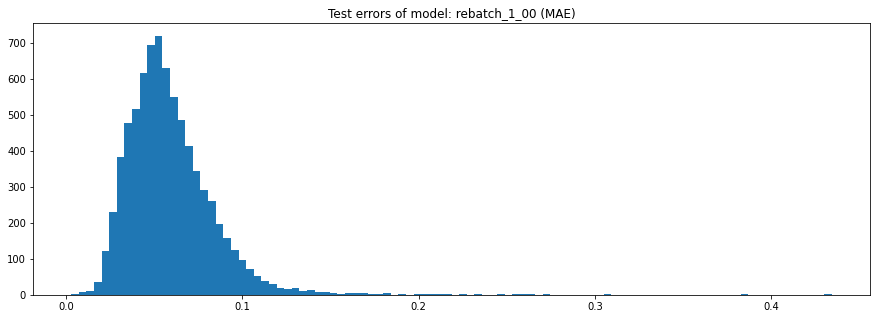

In [5]:
# Seq2seq

_, _, _, E_seq2seq, stats_seq2seq = holdout.run_test(
    model = seq2seq, 
    params = params, 
    check_test_performance = True, 
    return_stats = True) 


Check model performance on Validation data.
Done in 302.59ss.

	MAE Loss: 0.5480108857154846

Error statistics:
	Mean:            0.5480094
	St dev:          0.21135655 

	Min:             0.0
	25th percentile: 0.3788064271211624
	Median:          0.57117313
	75th percentile: 0.7102163434028625
	Max:             1.2848921


Check model performance on Test data.
Done in 303.67ss.

	MAE Loss: 0.5487329959869385

Error statistics:
	Mean:            0.54873157
	St dev:          0.21106702 

	Min:             0.0
	25th percentile: 0.38072822988033295
	Median:          0.57197475
	75th percentile: 0.7085483074188232
	Max:             1.2915955


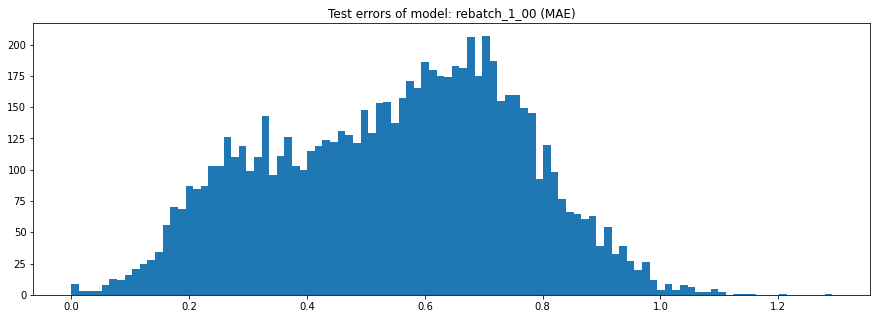

In [6]:
# GAN's Generator

_, _, _, E_gan, stats_gan = holdout.run_test(
    model = GAN, 
    params = params, 
    check_test_performance = True, 
    return_stats = True) 


Check model performance on Validation data.
Done in 322.21ss.

	MAE Loss: 0.04670098423957825

Error statistics:
	Mean:            0.046700977
	St dev:          0.0157721 

	Min:             0.002786517
	25th percentile: 0.035480765625834465
	Median:          0.045017138
	75th percentile: 0.05553138628602028
	Max:             0.20436941


Check model performance on Test data.
Done in 313.27ss.

	MAE Loss: 0.0466911755502224

Error statistics:
	Mean:            0.046691168
	St dev:          0.015540862 

	Min:             0.0029406825
	25th percentile: 0.03535008616745472
	Median:          0.04525705
	75th percentile: 0.05576721020042896
	Max:             0.18967311


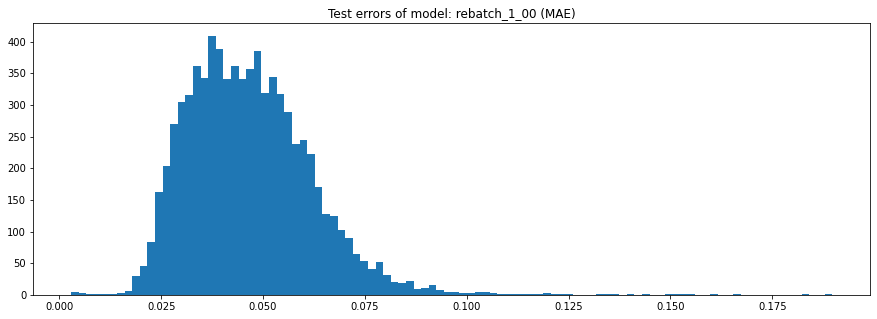

In [7]:
# Partial GAN's Generator

_, _, _, E_pgan, stats_pgan = holdout.run_test(
    model = pGAN, 
    params = params, 
    check_test_performance = True, 
    return_stats = True) 

Let's take a look at how error distributions compare to each other:

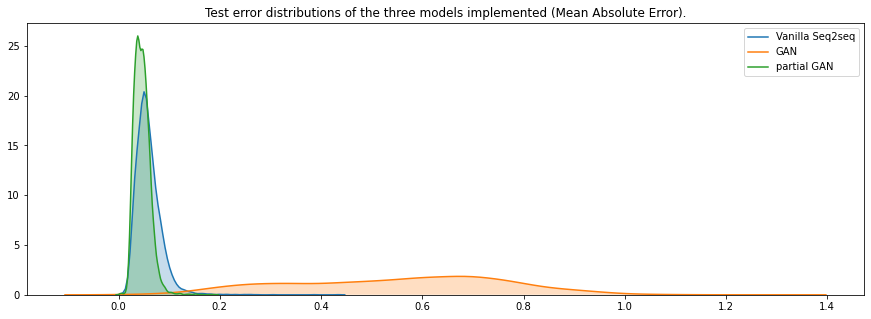

In [8]:
plt.figure(figsize=(15,5))
plt.title('Test error distributions of the three models implemented (Mean Absolute Error).')
seaborn.kdeplot(E_seq2seq, shade=True, label='Vanilla Seq2seq')
seaborn.kdeplot(E_gan, shade=True, label='GAN')
seaborn.kdeplot(E_pgan, shade=True, label='partial GAN')
plt.show() 

It seems clear that partial GAN is the best model. The Discriminator's feedback provided a slight improvement over the vanilla Seq2seq model, which is its real competitor. A plain, canonical GAN seems insufficient.

Let's take a closer look at the two best models:

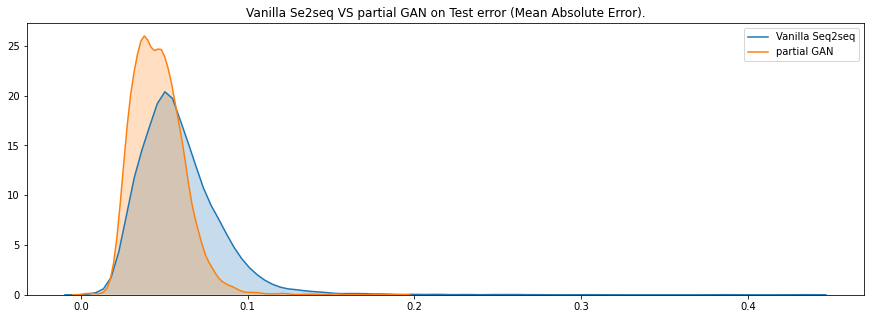

In [9]:
plt.figure(figsize=(15,5))
plt.title('Vanilla Se2seq VS partial GAN on Test error (Mean Absolute Error).')
seaborn.kdeplot(E_seq2seq, shade=True, label='Vanilla Seq2seq')
seaborn.kdeplot(E_pgan, shade=True, label='partial GAN')
plt.show() 